# Steps to build a Neural Network in NumPy

<ol>1. Loading the dataset (Input and Output)</ol>
<ol>2. Architecture of the model (# input, hidden and output neurons)</ol>
<ol>3. Initializing the weights for all the layers</ol>
<ol>4. Implementing forward propagation</ol>
<ol>5. Implementing backward propagation</ol>
<ol>6. Train the model for n epochs </ol>

## 1. Loading the dataset (Input and Output)

In [1]:
# importing required libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# version of numpy library
print('Version of numpy:',np.__version__)

Version of numpy: 1.19.2


In [3]:
# version of matplotlib library
print('Version of matplotlib:',matplotlib.__version__)

Version of matplotlib: 3.3.4


In [5]:
# creating the input array
X=np.array([[1,0,1,0], [1,0,1,1], [0,1,0,1]])
print ('\n Input:')
print(X)
# shape of input array
print('\n Shape of Input:', X.shape)


 Input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]

 Shape of Input: (3, 4)


There are 3 observations with 4 features above.

This needs to be transposed to make the features as rows as shown below.


In [6]:
# converting the input in matrix form
X = X.T
print('\n Input in matrix form:')
print(X)
# shape of input matrix
print('\n Shape of Input Matrix:', X.shape)


 Input in matrix form:
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]

 Shape of Input Matrix: (4, 3)


Above the matrix has forur features for each of the 3 observations.

In [7]:
# creating the output array
y=np.array([[1],[1],[0]])
print ('\n Actual Output:')
print(y)

# output in matrix form
y = y.T

print ('\n Output in matrix form:')
print(y)

# shape of input array
print('\n Shape of Output:', y.shape)


 Actual Output:
[[1]
 [1]
 [0]]

 Output in matrix form:
[[1 1 0]]

 Shape of Output: (1, 3)


The shape of the output is simple - 1 outpout for each of the 3 observations.

## 2. Architecture of the model (# input, hidden and output neurons)

In [9]:
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons - tis was chosen by experience.  Experimentation is often required.
output_neurons = 1 # number of neurons at output layer

![alt text](https://drive.google.com/uc?id=1zrEFVsc6bMQZ7fRxbK4DRceaG78k26Pc)

## 3. Initializing the weights for all the layers

NOTE: For simplicity, we are assuming that the bias for all the layers is 0.  This makes clacualtions easier.

In [10]:
# initializing weight
# Shape of w_ih should number of neurons at input layer X number of neurons at hidden layer
w_ih = np.random.uniform(size = (inputlayer_neurons, hiddenlayer_neurons))

# Shape of w_ho should number of neurons at hidden layer X number of neurons at output layer
w_ho = np.random.uniform(size = (hiddenlayer_neurons, output_neurons))

In [11]:
# shape of weight matrix
w_ih.shape, w_ho.shape

((4, 3), (3, 1))

## 4. Implementing forward propagation

![alt text](https://drive.google.com/uc?id=1YwD7vY9k84vZmjmE5CXgQ69fYyadPsox)

In [13]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [21]:
print(w_ih, '\n')
print(w_ih.T, '\n')
print(X, '\n')
np.dot(w_ih.T,X)

[[0.54722587 0.30552026 0.7466325 ]
 [0.80280789 0.08553086 0.12652166]
 [0.50624502 0.48234745 0.89006429]
 [0.04492012 0.05031994 0.94606546]] 

[[0.54722587 0.80280789 0.50624502 0.04492012]
 [0.30552026 0.08553086 0.48234745 0.05031994]
 [0.7466325  0.12652166 0.89006429 0.94606546]] 

[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]] 



array([[1.05347089, 1.09839101, 0.84772801],
       [0.7878677 , 0.83818764, 0.1358508 ],
       [1.63669679, 2.58276225, 1.07258712]])

In [22]:
# hidden layer activations

hidden_layer_input = np.dot(w_ih.T, X)
hiddenlayer_activations = sigmoid(hidden_layer_input)

![alt text](https://drive.google.com/uc?id=1ETMoLD1fwi5u1HHLqtAdVUs-P8HNOU_p)

In [23]:
print(w_ho, '\n')
print(w_ho.T, '\n')

[[0.62784361]
 [0.76322028]
 [0.12991341]] 

[[0.62784361 0.76322028 0.12991341]] 



In [24]:
# calculating the output
output_layer_input = np.dot(w_ho.T, hiddenlayer_activations)
output = sigmoid(output_layer_input)

In [25]:
# output
output

array([[0.7500492 , 0.7548103 , 0.71987378]])

## 5. Implementing backward propagation

![alt text](https://drive.google.com/uc?id=1uYdg4mQL-B9o7BTOLnfoYUhh_LxTnpcW)

In [26]:
# calculating error
error = np.square(y-output)/2

### Rate of change of error w.r.t weight between hidden and output layer

![alt text](https://drive.google.com/uc?id=1_KexjgVJGRptZ6t1eobTter3mfIGo9rs)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t weights between hidden and output layer**

In [30]:
# rate of change of error w.r.t. output (with respect to)
error_wrt_output = -(y-output)

In [27]:
# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output, (1-output))

In [28]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
Z2_wrt_who = hiddenlayer_activations

In [31]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_who.shape

((1, 3), (1, 3), (3, 3))

In [33]:
# shape of weights of output layer
w_ho.shape

(3, 1)

![alt text](https://drive.google.com/uc?id=1VesmZOVpfgLFESvOFd7dE-YHNtSMMkvM)

In [34]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_who = np.dot(Z2_wrt_who, (error_wrt_output * output_wrt_Z2).T)

In [35]:
error_wrt_who.shape

(3, 1)

### Rate of change of error w.r.t weight between input and hidden layer

![alt text](https://drive.google.com/uc?id=1X4-iInwlv7ber3fwgtqHuHTuFRci-tMV)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t hidden layer activations**

**d. Rate of change of hidden layer activations w.r.t Z1**

**e. Rate of change of Z1 w.r.t weights between input and hidden layer**

In [36]:
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

In [37]:
# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output,(1-output))

In [38]:
# rate of change of Z2 w.r.t. hidden layer activations
Z2_wrt_h1 = w_ho

In [39]:
# rate of change of hidden layer activations w.r.t. Z1
h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))

In [40]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
Z1_wrt_wih = X

In [41]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_h1.shape, h1_wrt_Z1.shape, Z1_wrt_wih.shape

((1, 3), (1, 3), (3, 1), (3, 3), (4, 3))

In [42]:
# shape of weights of hidden layer
w_ih.shape

(4, 3)

![alt text](https://drive.google.com/uc?id=1RkG5x1NEFWlF3tj0OlswOWvBcV5XNV1C)

In [43]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(output_wrt_Z2*error_wrt_output))).T)

In [44]:
error_wrt_wih.shape

(4, 3)

### Update the parameters

![alt text](https://drive.google.com/uc?id=1A5jaB3WjZx9yrJkk9imVEvP3PZodjapE)

In [45]:
# defining the learning rate
lr = 0.01

In [46]:
# initial w_ho and w_ih
w_ho

array([[0.62784361],
       [0.76322028],
       [0.12991341]])

In [47]:
w_ih

array([[0.54722587, 0.30552026, 0.7466325 ],
       [0.80280789, 0.08553086, 0.12652166],
       [0.50624502, 0.48234745, 0.89006429],
       [0.04492012, 0.05031994, 0.94606546]])

In [48]:
# updating the weights of output layer
w_ho = w_ho - lr * error_wrt_who

In [49]:
# updating the weights of hidden layer
w_ih = w_ih - lr * error_wrt_wih

In [50]:
# updated w_ho and w_ih
w_ho

array([[0.62751506],
       [0.7630841 ],
       [0.12964594]])

In [51]:
w_ih

array([[0.5473357 , 0.30567011, 0.74664465],
       [0.80261652, 0.08525515, 0.12648584],
       [0.50635484, 0.48249729, 0.89007645],
       [0.04478218, 0.05011722, 0.9460335 ]])

## 6. Training the model for n epochs

In [52]:
# defining the model architecture
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight
w_ih = np.random.uniform(size = (inputlayer_neurons, hiddenlayer_neurons))
w_ho = np.random.uniform(size = (hiddenlayer_neurons, output_neurons))

# defining the parameters
lr = 0.01
epochs = 10000

In [53]:
# initial w_ih and w_ho
w_ih

array([[0.87692519, 0.93387377, 0.89110658],
       [0.37709867, 0.30319279, 0.92888331],
       [0.55281563, 0.07691684, 0.33902872],
       [0.39423275, 0.77906524, 0.96034196]])

In [54]:
w_ho

array([[0.10849675],
       [0.35860144],
       [0.97911336]])

In [55]:
error_epoch = []
for i in range(epochs):
    # Forward Propogation
    
    # hidden layer activations
    hidden_layer_input = np.dot(w_ih.T, X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)    
    # calculating the output
    output_layer_input = np.dot(w_ho.T, hiddenlayer_activations)
    output = sigmoid(output_layer_input)
    
    
    # Backward Propagation
    
    # calculating error
    error = np.square(y-output)/2
    error_wrt_output = -(y-output)
    output_wrt_Z2 = np.multiply(output, (1-output))
    Z2_wrt_who = hiddenlayer_activations
    # rate of change of error w.r.t weight between hidden and output layer
    error_wrt_who = np.dot(Z2_wrt_who, (error_wrt_output * output_wrt_Z2).T)
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = np.multiply(hiddenlayer_activations, (1-hiddenlayer_activations))
    Z1_wrt_wih = X
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih = np.dot(Z1_wrt_wih, (h1_wrt_Z1 * np.dot(Z2_wrt_h1, (error_wrt_output * output_wrt_Z2))).T)

    # updating the weights between hidden and output layer
    w_ho = w_ho - lr * error_wrt_who
    # updating the weights between input and hidden layer
    w_ih = w_ih - lr * error_wrt_wih
    
    # appending the error of each epoch
    error_epoch.append(np.average(error))

In [56]:
# updated w_ih and w_ho
w_ih

array([[ 1.39811101,  0.96533859,  1.5804776 ],
       [-1.09419437,  0.4317762 , -1.03200844],
       [ 1.07400145,  0.10838166,  1.02839975],
       [-0.78672647,  0.90675408, -0.69329647]])

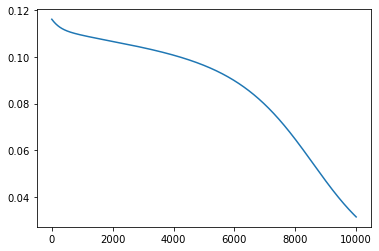

In [63]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(error_epoch))

In [58]:
# final output from the model
output

array([[0.86746812, 0.81923313, 0.37151069]])

In [59]:
# actual target
y

array([[1, 1, 0]])

In [60]:
# error at last epoch
error

array([[0.00878235, 0.01633833, 0.0690101 ]])